In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/veroandreo/repos/github/grass_ncsu_2023':
  os.chdir(r'/home/veroandreo/repos/github/grass_ncsu_2023')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_87959/3534130014.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib64/python3.10/importlib/_bootstrap.py": 1680645435.0, "/usr/lib64/python3.10/importlib/_bootstrap_external.py": 1680645435.0, "/usr/lib64/python3.10/codecs.py": 1680645435.0, "/usr/lib64/python3.10/encodings/aliases.py": 1680645435.0, "/usr/lib64/python3.10/encodings/__init__.py": 1680645435.0, "/usr/lib64/python3.10/encodings/utf_8.py": 1680645435.0, "/usr/lib64/python3.10/abc.py": 1680645435.0, "/usr/lib64/python3.10/io.py": 1680645435.0, "/usr/lib64/python3.10/stat.py": 1680645435.0, "/usr/lib64/python3.10/_collections_abc.py": 1680645435.0, "/usr/lib64/python3.10/genericpath.py": 1680645435.0, "/usr/lib64/python3.10/posixpath.py": 1680645435.0, "/usr/lib64/python3.10/os.py": 1680645435.0, "/usr/lib64/python3.10/_sitebuiltins.py": 1680645435.0, "/usr/lib64/python3.10/types.py": 1680645435.0, "/usr/lib64/python3.10/warnings.py": 1680645435.0, "/usr/lib64/python3.10/importlib/__init__.py": 1680645435.0, "/usr/lib64/python3.10/importlib/_abc.py": 1680645435.0, "/usr/lib64/pyt

In [2]:
import os

# Data directory
homedir = os.path.join(os.path.expanduser('~'), "grass_ncsu_2023")

# GRASS GIS database variables
#grassbin = "grassdev"
grassbin = "grass"
grassdata = os.path.join(homedir, "grassdata")
location = "eu_laea"
mapset = "italy_LST_daily"

In [3]:
# Check the GRASS GIS installation
import subprocess
print(subprocess.check_output([grassbin, "--config", "version"], text=True))

8.2.0



In [4]:
# Ask GRASS GIS where its Python packages are 
import sys
sys.path.append(
    subprocess.check_output([grassbin, "--config", "python_path"], text=True).strip()
)

In [5]:
# Import the GRASS GIS packages we need
import grass.script as gs
import grass.jupyter as gj

# Start the GRASS GIS Session
session = gj.init(grassdata, location, mapset)

In [6]:
# List vector elements
gs.list_grouped(type="vector")['italy_LST_daily']

['aedes_albopictus',
 'aedes_buffer',
 'background_points',
 'italy_borders_0',
 'italy_borders_1',
 'mask_bg',
 'vect_mask']

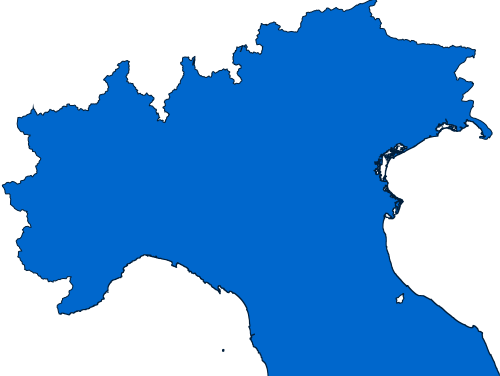

In [7]:
# Display vector map
it_map = gj.Map(width=500, use_region=True)
it_map.d_vect(map="italy_borders_0")
it_map.show()

In [8]:
# List raster elements
rast = gs.list_grouped(type="raster", pattern="lst*")['italy_LST_daily']
rast[0:10]

['lst_2014.001_avg',
 'lst_2014.002_avg',
 'lst_2014.003_avg',
 'lst_2014.004_avg',
 'lst_2014.005_avg',
 'lst_2014.006_avg',
 'lst_2014.007_avg',
 'lst_2014.008_avg',
 'lst_2014.009_avg',
 'lst_2014.010_avg']


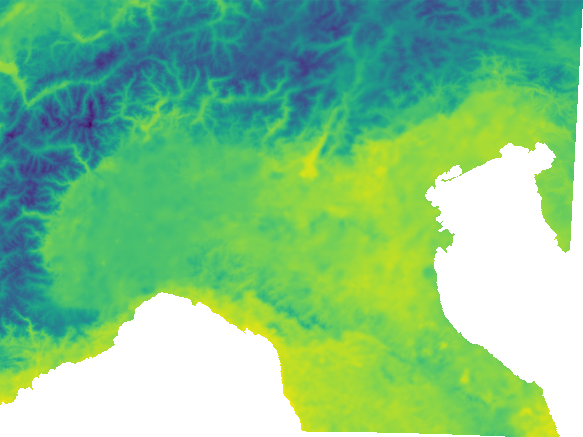

In [9]:
# Display raster map with interactive class
lst_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
lst_map.add_raster("lst_2014.005_avg")
lst_map.add_layer_control(position = "bottomright")
lst_map.show()

In [10]:
# Import mosquito records
gs.run_command("v.import",
               input=os.path.join(homedir,"aedes_albopictus.gpkg"),
               output="aedes_albopictus")


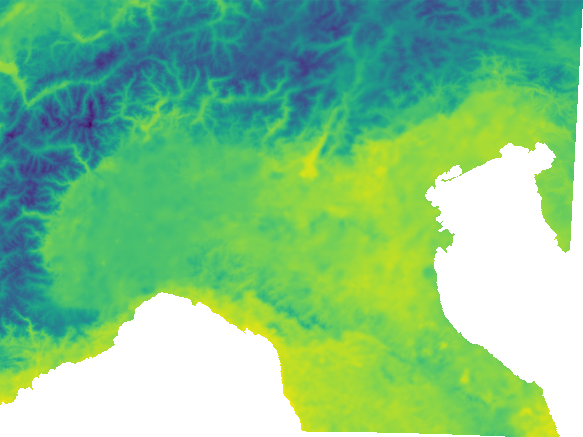

In [11]:
# Display raster map with interactive class
lst_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
lst_map.add_raster("lst_2014.005_avg")
lst_map.add_vector("aedes_albopictus")
lst_map.add_layer_control(position = "bottomright")
lst_map.show()

In [12]:
# Set computational region
# region = gs.parse_command("g.region", raster="lst_2014.001_avg", flags="g")
# region

In [13]:
# Install extension (requires pygbif: pip install pygbif)
# gs.run_command("g.extension",
#                extension="v.in.pygbif")

In [14]:
# Import data from GBIF
# gs.run_command("v.in.pygbif", 
#                output="aedes_albopictus",
#                taxa="Aedes albopictus",
#                date_from="2014-01-01",
#                date_to="2018-12-31")

In [15]:
# Create buffer around Aedes albopictus records
gs.run_command("v.buffer",
               input="aedes_albopictus",
               output="aedes_buffer",
               distance=2000)

In [16]:
# Set computational region
region = gs.parse_command("g.region", raster="lst_2014.001_avg", flags="g")
region

{'projection': '99',
 'zone': '0',
 'n': '2666000',
 's': '2228000',
 'w': '4053000',
 'e': '4635000',
 'nsres': '1000',
 'ewres': '1000',
 'rows': '438',
 'cols': '582',
 'cells': '254916'}

In [17]:
# Create a vector mask to limit background points
expression="MASK = if(lst_2014.001_avg, 1, null())"
gs.raster.mapcalc(exp=expression)

gs.run_command("r.to.vect", 
               input="MASK",
               output="vect_mask",
               type="area")

In [18]:
# Subtract buffers from vector mask
gs.run_command("v.overlay",
               ainput="vect_mask",
               binput="aedes_buffer",
               operator="xor",
               output="mask_bg")

In [19]:
# Display raster map with interactive class
mask_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
mask_map.add_vector("mask_bg")
mask_map.add_layer_control(position = "bottomright")
mask_map.show()

In [20]:
# Generate random background points
gs.run_command("v.random",
               output="background_points",
               npoints=1000,
               restrict="mask_bg",
               seed=3749)

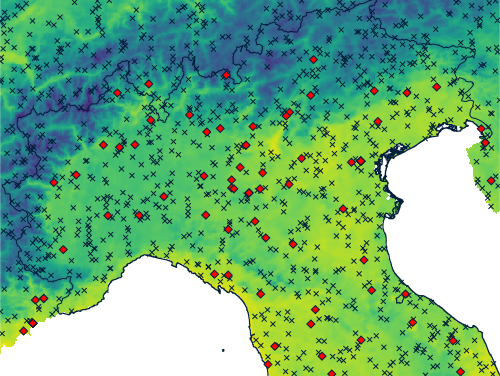

In [21]:
# Display vector map
pb_map = gj.Map(width=500, use_region=True)
pb_map.d_rast(map="lst_2014.005_avg")
pb_map.d_vect(map="italy_borders_0", type="boundary")
pb_map.d_vect(map="background_points")
pb_map.d_vect(map="aedes_albopictus", icon="basic/diamond", fill_color="red", size=8)
pb_map.show()

In [22]:
# Create time series 
gs.run_command("t.create",
               type="strds",
               temporaltype="absolute",
               output="lst_daily",
               title="Average Daily LST",
               description="Average daily LST in degree C - 2014-2018")

In [23]:
# Check it is created
gs.run_command("t.list",
              type="strds")

annual_autumnal_cooling@italy_LST_daily
annual_mask@italy_LST_daily
annual_mask_0@italy_LST_daily
annual_spring_warming@italy_LST_daily
count_tmean_higher20_lower30@italy_LST_daily
lower_m10_consec_days@italy_LST_daily
lst_daily@italy_LST_daily
tmean_higher20_lower30@italy_LST_daily


In [24]:
# Get list of maps 
map_list = gs.list_grouped(type="raster", pattern="lst_201*")['italy_LST_daily']
map_list

['lst_2014.001_avg',
 'lst_2014.002_avg',
 'lst_2014.003_avg',
 'lst_2014.004_avg',
 'lst_2014.005_avg',
 'lst_2014.006_avg',
 'lst_2014.007_avg',
 'lst_2014.008_avg',
 'lst_2014.009_avg',
 'lst_2014.010_avg',
 'lst_2014.011_avg',
 'lst_2014.012_avg',
 'lst_2014.013_avg',
 'lst_2014.014_avg',
 'lst_2014.015_avg',
 'lst_2014.016_avg',
 'lst_2014.017_avg',
 'lst_2014.018_avg',
 'lst_2014.019_avg',
 'lst_2014.020_avg',
 'lst_2014.021_avg',
 'lst_2014.022_avg',
 'lst_2014.023_avg',
 'lst_2014.024_avg',
 'lst_2014.025_avg',
 'lst_2014.026_avg',
 'lst_2014.027_avg',
 'lst_2014.028_avg',
 'lst_2014.029_avg',
 'lst_2014.030_avg',
 'lst_2014.031_avg',
 'lst_2014.032_avg',
 'lst_2014.033_avg',
 'lst_2014.034_avg',
 'lst_2014.035_avg',
 'lst_2014.036_avg',
 'lst_2014.037_avg',
 'lst_2014.038_avg',
 'lst_2014.039_avg',
 'lst_2014.040_avg',
 'lst_2014.041_avg',
 'lst_2014.042_avg',
 'lst_2014.043_avg',
 'lst_2014.044_avg',
 'lst_2014.045_avg',
 'lst_2014.046_avg',
 'lst_2014.047_avg',
 'lst_2014.04

In [25]:
# Register maps in strds  
gs.run_command("t.register", 
               input="lst_daily",
               maps=map_list,
               increment="1 days",
               start="2014-01-01", 
               flags="i")

In [26]:
# Get info about the strds
gs.run_command("t.info",
               input="lst_daily")

 +-------------------- Space Time Raster Dataset -----------------------------+
 |                                                                            |
 +-------------------- Basic information -------------------------------------+
 | Id: ........................ lst_daily@italy_LST_daily
 | Name: ...................... lst_daily
 | Mapset: .................... italy_LST_daily
 | Creator: ................... veroandreo
 | Temporal type: ............. absolute
 | Creation time: ............. 2023-06-02 12:42:40.595876
 | Modification time:.......... 2023-06-02 12:44:34.918052
 | Semantic type:.............. mean
 +-------------------- Absolute time -----------------------------------------+
 | Start time:................. 2014-01-01 00:00:00
 | End time:................... 2019-01-01 00:00:00
 | Granularity:................ 1 day
 | Temporal type of maps:...... interval
 +-------------------- Spatial extent ----------------------------------------+
 | North:.....................

In [27]:
# January average LST
gs.run_command("t.rast.series",
               input="lst_daily",
               method="average",
               where="strftime('%m', start_time)='01'",
               output="lst_average_jan")

In [28]:
# Get map info and check values
gs.raster_info("lst_average_jan")['min'], gs.raster_info("lst_average_jan")['max']

(-20.5722854082661, 9.66456829637104)

In [29]:
# Define list of months as required
months=['{0:02d}'.format(m) for m in range(1,13)]

for m in months:
    gs.run_command("t.rast.list",
                   input="lst_daily",
                   where=f"strftime('%m', start_time)='{m}'")

name|mapset|start_time|end_time
lst_2014.001_avg|italy_LST_daily|2014-01-01 00:00:00|2014-01-02 00:00:00
lst_2014.002_avg|italy_LST_daily|2014-01-02 00:00:00|2014-01-03 00:00:00
lst_2014.003_avg|italy_LST_daily|2014-01-03 00:00:00|2014-01-04 00:00:00
lst_2014.004_avg|italy_LST_daily|2014-01-04 00:00:00|2014-01-05 00:00:00
lst_2014.005_avg|italy_LST_daily|2014-01-05 00:00:00|2014-01-06 00:00:00
lst_2014.006_avg|italy_LST_daily|2014-01-06 00:00:00|2014-01-07 00:00:00
lst_2014.007_avg|italy_LST_daily|2014-01-07 00:00:00|2014-01-08 00:00:00
lst_2014.008_avg|italy_LST_daily|2014-01-08 00:00:00|2014-01-09 00:00:00
lst_2014.009_avg|italy_LST_daily|2014-01-09 00:00:00|2014-01-10 00:00:00
lst_2014.010_avg|italy_LST_daily|2014-01-10 00:00:00|2014-01-11 00:00:00
lst_2014.011_avg|italy_LST_daily|2014-01-11 00:00:00|2014-01-12 00:00:00
lst_2014.012_avg|italy_LST_daily|2014-01-12 00:00:00|2014-01-13 00:00:00
lst_2014.013_avg|italy_LST_daily|2014-01-13 00:00:00|2014-01-14 00:00:00
lst_2014.014_avg|it

name|mapset|start_time|end_time
lst_2014.032_avg|italy_LST_daily|2014-02-01 00:00:00|2014-02-02 00:00:00
lst_2014.033_avg|italy_LST_daily|2014-02-02 00:00:00|2014-02-03 00:00:00
lst_2014.034_avg|italy_LST_daily|2014-02-03 00:00:00|2014-02-04 00:00:00
lst_2014.035_avg|italy_LST_daily|2014-02-04 00:00:00|2014-02-05 00:00:00
lst_2014.036_avg|italy_LST_daily|2014-02-05 00:00:00|2014-02-06 00:00:00
lst_2014.037_avg|italy_LST_daily|2014-02-06 00:00:00|2014-02-07 00:00:00
lst_2014.038_avg|italy_LST_daily|2014-02-07 00:00:00|2014-02-08 00:00:00
lst_2014.039_avg|italy_LST_daily|2014-02-08 00:00:00|2014-02-09 00:00:00
lst_2014.040_avg|italy_LST_daily|2014-02-09 00:00:00|2014-02-10 00:00:00
lst_2014.041_avg|italy_LST_daily|2014-02-10 00:00:00|2014-02-11 00:00:00
lst_2014.042_avg|italy_LST_daily|2014-02-11 00:00:00|2014-02-12 00:00:00
lst_2014.043_avg|italy_LST_daily|2014-02-12 00:00:00|2014-02-13 00:00:00
lst_2014.044_avg|italy_LST_daily|2014-02-13 00:00:00|2014-02-14 00:00:00
lst_2014.045_avg|it

name|mapset|start_time|end_time
lst_2014.060_avg|italy_LST_daily|2014-03-01 00:00:00|2014-03-02 00:00:00
lst_2014.061_avg|italy_LST_daily|2014-03-02 00:00:00|2014-03-03 00:00:00
lst_2014.062_avg|italy_LST_daily|2014-03-03 00:00:00|2014-03-04 00:00:00
lst_2014.063_avg|italy_LST_daily|2014-03-04 00:00:00|2014-03-05 00:00:00
lst_2014.064_avg|italy_LST_daily|2014-03-05 00:00:00|2014-03-06 00:00:00
lst_2014.065_avg|italy_LST_daily|2014-03-06 00:00:00|2014-03-07 00:00:00
lst_2014.066_avg|italy_LST_daily|2014-03-07 00:00:00|2014-03-08 00:00:00
lst_2014.067_avg|italy_LST_daily|2014-03-08 00:00:00|2014-03-09 00:00:00
lst_2014.068_avg|italy_LST_daily|2014-03-09 00:00:00|2014-03-10 00:00:00
lst_2014.069_avg|italy_LST_daily|2014-03-10 00:00:00|2014-03-11 00:00:00
lst_2014.070_avg|italy_LST_daily|2014-03-11 00:00:00|2014-03-12 00:00:00
lst_2014.071_avg|italy_LST_daily|2014-03-12 00:00:00|2014-03-13 00:00:00
lst_2014.072_avg|italy_LST_daily|2014-03-13 00:00:00|2014-03-14 00:00:00
lst_2014.073_avg|it

name|mapset|start_time|end_time
lst_2014.091_avg|italy_LST_daily|2014-04-01 00:00:00|2014-04-02 00:00:00
lst_2014.092_avg|italy_LST_daily|2014-04-02 00:00:00|2014-04-03 00:00:00
lst_2014.093_avg|italy_LST_daily|2014-04-03 00:00:00|2014-04-04 00:00:00
lst_2014.094_avg|italy_LST_daily|2014-04-04 00:00:00|2014-04-05 00:00:00
lst_2014.095_avg|italy_LST_daily|2014-04-05 00:00:00|2014-04-06 00:00:00
lst_2014.096_avg|italy_LST_daily|2014-04-06 00:00:00|2014-04-07 00:00:00
lst_2014.097_avg|italy_LST_daily|2014-04-07 00:00:00|2014-04-08 00:00:00
lst_2014.098_avg|italy_LST_daily|2014-04-08 00:00:00|2014-04-09 00:00:00
lst_2014.099_avg|italy_LST_daily|2014-04-09 00:00:00|2014-04-10 00:00:00
lst_2014.100_avg|italy_LST_daily|2014-04-10 00:00:00|2014-04-11 00:00:00
lst_2014.101_avg|italy_LST_daily|2014-04-11 00:00:00|2014-04-12 00:00:00
lst_2014.102_avg|italy_LST_daily|2014-04-12 00:00:00|2014-04-13 00:00:00
lst_2014.103_avg|italy_LST_daily|2014-04-13 00:00:00|2014-04-14 00:00:00
lst_2014.104_avg|it

name|mapset|start_time|end_time
lst_2014.121_avg|italy_LST_daily|2014-05-01 00:00:00|2014-05-02 00:00:00
lst_2014.122_avg|italy_LST_daily|2014-05-02 00:00:00|2014-05-03 00:00:00
lst_2014.123_avg|italy_LST_daily|2014-05-03 00:00:00|2014-05-04 00:00:00
lst_2014.124_avg|italy_LST_daily|2014-05-04 00:00:00|2014-05-05 00:00:00
lst_2014.125_avg|italy_LST_daily|2014-05-05 00:00:00|2014-05-06 00:00:00
lst_2014.126_avg|italy_LST_daily|2014-05-06 00:00:00|2014-05-07 00:00:00
lst_2014.127_avg|italy_LST_daily|2014-05-07 00:00:00|2014-05-08 00:00:00
lst_2014.128_avg|italy_LST_daily|2014-05-08 00:00:00|2014-05-09 00:00:00
lst_2014.129_avg|italy_LST_daily|2014-05-09 00:00:00|2014-05-10 00:00:00
lst_2014.130_avg|italy_LST_daily|2014-05-10 00:00:00|2014-05-11 00:00:00
lst_2014.131_avg|italy_LST_daily|2014-05-11 00:00:00|2014-05-12 00:00:00
lst_2014.132_avg|italy_LST_daily|2014-05-12 00:00:00|2014-05-13 00:00:00
lst_2014.133_avg|italy_LST_daily|2014-05-13 00:00:00|2014-05-14 00:00:00
lst_2014.134_avg|it

name|mapset|start_time|end_time
lst_2014.152_avg|italy_LST_daily|2014-06-01 00:00:00|2014-06-02 00:00:00
lst_2014.153_avg|italy_LST_daily|2014-06-02 00:00:00|2014-06-03 00:00:00
lst_2014.154_avg|italy_LST_daily|2014-06-03 00:00:00|2014-06-04 00:00:00
lst_2014.155_avg|italy_LST_daily|2014-06-04 00:00:00|2014-06-05 00:00:00
lst_2014.156_avg|italy_LST_daily|2014-06-05 00:00:00|2014-06-06 00:00:00
lst_2014.157_avg|italy_LST_daily|2014-06-06 00:00:00|2014-06-07 00:00:00
lst_2014.158_avg|italy_LST_daily|2014-06-07 00:00:00|2014-06-08 00:00:00
lst_2014.159_avg|italy_LST_daily|2014-06-08 00:00:00|2014-06-09 00:00:00
lst_2014.160_avg|italy_LST_daily|2014-06-09 00:00:00|2014-06-10 00:00:00
lst_2014.161_avg|italy_LST_daily|2014-06-10 00:00:00|2014-06-11 00:00:00
lst_2014.162_avg|italy_LST_daily|2014-06-11 00:00:00|2014-06-12 00:00:00
lst_2014.163_avg|italy_LST_daily|2014-06-12 00:00:00|2014-06-13 00:00:00
lst_2014.164_avg|italy_LST_daily|2014-06-13 00:00:00|2014-06-14 00:00:00
lst_2014.165_avg|it

name|mapset|start_time|end_time
lst_2014.182_avg|italy_LST_daily|2014-07-01 00:00:00|2014-07-02 00:00:00
lst_2014.183_avg|italy_LST_daily|2014-07-02 00:00:00|2014-07-03 00:00:00
lst_2014.184_avg|italy_LST_daily|2014-07-03 00:00:00|2014-07-04 00:00:00
lst_2014.185_avg|italy_LST_daily|2014-07-04 00:00:00|2014-07-05 00:00:00
lst_2014.186_avg|italy_LST_daily|2014-07-05 00:00:00|2014-07-06 00:00:00
lst_2014.187_avg|italy_LST_daily|2014-07-06 00:00:00|2014-07-07 00:00:00
lst_2014.188_avg|italy_LST_daily|2014-07-07 00:00:00|2014-07-08 00:00:00
lst_2014.189_avg|italy_LST_daily|2014-07-08 00:00:00|2014-07-09 00:00:00
lst_2014.190_avg|italy_LST_daily|2014-07-09 00:00:00|2014-07-10 00:00:00
lst_2014.191_avg|italy_LST_daily|2014-07-10 00:00:00|2014-07-11 00:00:00
lst_2014.192_avg|italy_LST_daily|2014-07-11 00:00:00|2014-07-12 00:00:00
lst_2014.193_avg|italy_LST_daily|2014-07-12 00:00:00|2014-07-13 00:00:00
lst_2014.194_avg|italy_LST_daily|2014-07-13 00:00:00|2014-07-14 00:00:00
lst_2014.195_avg|it

name|mapset|start_time|end_time
lst_2014.213_avg|italy_LST_daily|2014-08-01 00:00:00|2014-08-02 00:00:00
lst_2014.214_avg|italy_LST_daily|2014-08-02 00:00:00|2014-08-03 00:00:00
lst_2014.215_avg|italy_LST_daily|2014-08-03 00:00:00|2014-08-04 00:00:00
lst_2014.216_avg|italy_LST_daily|2014-08-04 00:00:00|2014-08-05 00:00:00
lst_2014.217_avg|italy_LST_daily|2014-08-05 00:00:00|2014-08-06 00:00:00
lst_2014.218_avg|italy_LST_daily|2014-08-06 00:00:00|2014-08-07 00:00:00
lst_2014.219_avg|italy_LST_daily|2014-08-07 00:00:00|2014-08-08 00:00:00
lst_2014.220_avg|italy_LST_daily|2014-08-08 00:00:00|2014-08-09 00:00:00
lst_2014.221_avg|italy_LST_daily|2014-08-09 00:00:00|2014-08-10 00:00:00
lst_2014.222_avg|italy_LST_daily|2014-08-10 00:00:00|2014-08-11 00:00:00
lst_2014.223_avg|italy_LST_daily|2014-08-11 00:00:00|2014-08-12 00:00:00
lst_2014.224_avg|italy_LST_daily|2014-08-12 00:00:00|2014-08-13 00:00:00
lst_2014.225_avg|italy_LST_daily|2014-08-13 00:00:00|2014-08-14 00:00:00
lst_2014.226_avg|it

name|mapset|start_time|end_time
lst_2014.244_avg|italy_LST_daily|2014-09-01 00:00:00|2014-09-02 00:00:00
lst_2014.245_avg|italy_LST_daily|2014-09-02 00:00:00|2014-09-03 00:00:00
lst_2014.246_avg|italy_LST_daily|2014-09-03 00:00:00|2014-09-04 00:00:00
lst_2014.247_avg|italy_LST_daily|2014-09-04 00:00:00|2014-09-05 00:00:00
lst_2014.248_avg|italy_LST_daily|2014-09-05 00:00:00|2014-09-06 00:00:00
lst_2014.249_avg|italy_LST_daily|2014-09-06 00:00:00|2014-09-07 00:00:00
lst_2014.250_avg|italy_LST_daily|2014-09-07 00:00:00|2014-09-08 00:00:00
lst_2014.251_avg|italy_LST_daily|2014-09-08 00:00:00|2014-09-09 00:00:00
lst_2014.252_avg|italy_LST_daily|2014-09-09 00:00:00|2014-09-10 00:00:00
lst_2014.253_avg|italy_LST_daily|2014-09-10 00:00:00|2014-09-11 00:00:00
lst_2014.254_avg|italy_LST_daily|2014-09-11 00:00:00|2014-09-12 00:00:00
lst_2014.255_avg|italy_LST_daily|2014-09-12 00:00:00|2014-09-13 00:00:00
lst_2014.256_avg|italy_LST_daily|2014-09-13 00:00:00|2014-09-14 00:00:00
lst_2014.257_avg|it

name|mapset|start_time|end_time
lst_2014.274_avg|italy_LST_daily|2014-10-01 00:00:00|2014-10-02 00:00:00
lst_2014.275_avg|italy_LST_daily|2014-10-02 00:00:00|2014-10-03 00:00:00
lst_2014.276_avg|italy_LST_daily|2014-10-03 00:00:00|2014-10-04 00:00:00
lst_2014.277_avg|italy_LST_daily|2014-10-04 00:00:00|2014-10-05 00:00:00
lst_2014.278_avg|italy_LST_daily|2014-10-05 00:00:00|2014-10-06 00:00:00
lst_2014.279_avg|italy_LST_daily|2014-10-06 00:00:00|2014-10-07 00:00:00
lst_2014.280_avg|italy_LST_daily|2014-10-07 00:00:00|2014-10-08 00:00:00
lst_2014.281_avg|italy_LST_daily|2014-10-08 00:00:00|2014-10-09 00:00:00
lst_2014.282_avg|italy_LST_daily|2014-10-09 00:00:00|2014-10-10 00:00:00
lst_2014.283_avg|italy_LST_daily|2014-10-10 00:00:00|2014-10-11 00:00:00
lst_2014.284_avg|italy_LST_daily|2014-10-11 00:00:00|2014-10-12 00:00:00
lst_2014.285_avg|italy_LST_daily|2014-10-12 00:00:00|2014-10-13 00:00:00
lst_2014.286_avg|italy_LST_daily|2014-10-13 00:00:00|2014-10-14 00:00:00
lst_2014.287_avg|it

name|mapset|start_time|end_time
lst_2014.305_avg|italy_LST_daily|2014-11-01 00:00:00|2014-11-02 00:00:00
lst_2014.306_avg|italy_LST_daily|2014-11-02 00:00:00|2014-11-03 00:00:00
lst_2014.307_avg|italy_LST_daily|2014-11-03 00:00:00|2014-11-04 00:00:00
lst_2014.308_avg|italy_LST_daily|2014-11-04 00:00:00|2014-11-05 00:00:00
lst_2014.309_avg|italy_LST_daily|2014-11-05 00:00:00|2014-11-06 00:00:00
lst_2014.310_avg|italy_LST_daily|2014-11-06 00:00:00|2014-11-07 00:00:00
lst_2014.311_avg|italy_LST_daily|2014-11-07 00:00:00|2014-11-08 00:00:00
lst_2014.312_avg|italy_LST_daily|2014-11-08 00:00:00|2014-11-09 00:00:00
lst_2014.313_avg|italy_LST_daily|2014-11-09 00:00:00|2014-11-10 00:00:00
lst_2014.314_avg|italy_LST_daily|2014-11-10 00:00:00|2014-11-11 00:00:00
lst_2014.315_avg|italy_LST_daily|2014-11-11 00:00:00|2014-11-12 00:00:00
lst_2014.316_avg|italy_LST_daily|2014-11-12 00:00:00|2014-11-13 00:00:00
lst_2014.317_avg|italy_LST_daily|2014-11-13 00:00:00|2014-11-14 00:00:00
lst_2014.318_avg|it

name|mapset|start_time|end_time
lst_2014.335_avg|italy_LST_daily|2014-12-01 00:00:00|2014-12-02 00:00:00
lst_2014.336_avg|italy_LST_daily|2014-12-02 00:00:00|2014-12-03 00:00:00
lst_2014.337_avg|italy_LST_daily|2014-12-03 00:00:00|2014-12-04 00:00:00
lst_2014.338_avg|italy_LST_daily|2014-12-04 00:00:00|2014-12-05 00:00:00
lst_2014.339_avg|italy_LST_daily|2014-12-05 00:00:00|2014-12-06 00:00:00
lst_2014.340_avg|italy_LST_daily|2014-12-06 00:00:00|2014-12-07 00:00:00
lst_2014.341_avg|italy_LST_daily|2014-12-07 00:00:00|2014-12-08 00:00:00
lst_2014.342_avg|italy_LST_daily|2014-12-08 00:00:00|2014-12-09 00:00:00
lst_2014.343_avg|italy_LST_daily|2014-12-09 00:00:00|2014-12-10 00:00:00
lst_2014.344_avg|italy_LST_daily|2014-12-10 00:00:00|2014-12-11 00:00:00
lst_2014.345_avg|italy_LST_daily|2014-12-11 00:00:00|2014-12-12 00:00:00
lst_2014.346_avg|italy_LST_daily|2014-12-12 00:00:00|2014-12-13 00:00:00
lst_2014.347_avg|italy_LST_daily|2014-12-13 00:00:00|2014-12-14 00:00:00
lst_2014.348_avg|it

In [30]:
# Now we estimate the climatologies for all months and methods
months=['{0:02d}'.format(m) for m in range(1,13)]
methods=["average","minimum","maximum"]

for m in months:
    for me in methods:
        gs.run_command("t.rast.series", 
                       input="lst_daily",
                       method=me,
                       where=f"strftime('%m', start_time)='{m}'",
                       output="lst_{}_{}".format(me,m))

In [31]:
# List newly created maps
map_list = gs.list_grouped(type="raster", pattern="*{average,minimum,maximum}*")['italy_LST_daily']
print(map_list)

['lst_average_01', 'lst_average_02', 'lst_average_03', 'lst_average_04', 'lst_average_05', 'lst_average_06', 'lst_average_07', 'lst_average_08', 'lst_average_09', 'lst_average_10', 'lst_average_11', 'lst_average_12', 'lst_average_jan', 'lst_maximum_01', 'lst_maximum_02', 'lst_maximum_03', 'lst_maximum_04', 'lst_maximum_05', 'lst_maximum_06', 'lst_maximum_07', 'lst_maximum_08', 'lst_maximum_09', 'lst_maximum_10', 'lst_maximum_11', 'lst_maximum_12', 'lst_minimum_01', 'lst_minimum_02', 'lst_minimum_03', 'lst_minimum_04', 'lst_minimum_05', 'lst_minimum_06', 'lst_minimum_07', 'lst_minimum_08', 'lst_minimum_09', 'lst_minimum_10', 'lst_minimum_11', 'lst_minimum_12']


In [32]:
# Remove lst_average_jan
gs.run_command("g.remove", type="raster", name="lst_average_jan", flags="f")

In [33]:
# Install extension
gs.run_command("g.extension",
               extension="r.bioclim")

In [34]:
# Get lists of maps needed
tmin=gs.list_grouped(type="raster", pattern="lst_minimum_??")['italy_LST_daily']
tmax=gs.list_grouped(type="raster", pattern="lst_maximum_??")['italy_LST_daily']
tavg=gs.list_grouped(type="raster", pattern="lst_average_??")['italy_LST_daily']

print(tmin,tmax,tavg)

['lst_minimum_01', 'lst_minimum_02', 'lst_minimum_03', 'lst_minimum_04', 'lst_minimum_05', 'lst_minimum_06', 'lst_minimum_07', 'lst_minimum_08', 'lst_minimum_09', 'lst_minimum_10', 'lst_minimum_11', 'lst_minimum_12'] ['lst_maximum_01', 'lst_maximum_02', 'lst_maximum_03', 'lst_maximum_04', 'lst_maximum_05', 'lst_maximum_06', 'lst_maximum_07', 'lst_maximum_08', 'lst_maximum_09', 'lst_maximum_10', 'lst_maximum_11', 'lst_maximum_12'] ['lst_average_01', 'lst_average_02', 'lst_average_03', 'lst_average_04', 'lst_average_05', 'lst_average_06', 'lst_average_07', 'lst_average_08', 'lst_average_09', 'lst_average_10', 'lst_average_11', 'lst_average_12']


In [35]:
# Estimate temperature related bioclimatic variables
gs.run_command("r.bioclim", 
               tmin=tmin, 
               tmax=tmax,
               tavg=tavg, 
               output="worldclim_") 

In [36]:
# List output maps
gs.list_grouped(type="raster", pattern="worldclim*")['italy_LST_daily']

['worldclim_bio01',
 'worldclim_bio02',
 'worldclim_bio03',
 'worldclim_bio04',
 'worldclim_bio05',
 'worldclim_bio06',
 'worldclim_bio07',
 'worldclim_bio10',
 'worldclim_bio11']


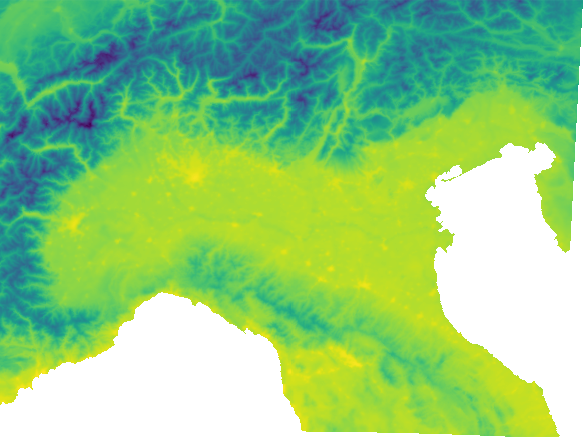
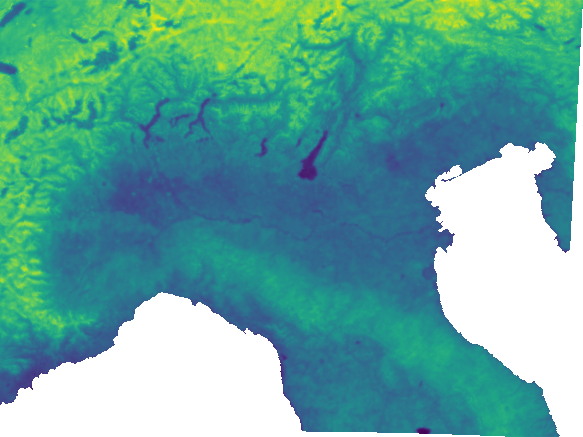

In [37]:
# Display raster map with interactive class
bio_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
bio_map.add_raster("worldclim_bio01")
bio_map.add_raster("worldclim_bio02")
bio_map.add_layer_control(position = "bottomright")
bio_map.show()

In [38]:
# Define list of months
months=['{0:02d}'.format(m) for m in range(2,5)]

In [39]:
# Annual spring warming
gs.run_command("t.rast.aggregate",
               input="lst_daily",
               output="annual_spring_warming",
               basename="spring_warming",
               suffix="gran",
               method="slope",
               granularity="1 years",
               where=f"strftime('%m',start_time)='{months[0]}' or strftime('%m',start_time)='{months[1]}' or strftime('%m', start_time)='{months[2]}'")

In [40]:
# Check raster maps in the STRDS
gs.run_command("t.rast.list", input="annual_spring_warming")

name|mapset|start_time|end_time
spring_warming_2014|italy_LST_daily|2014-01-01 00:00:00|2015-01-01 00:00:00
spring_warming_2015|italy_LST_daily|2015-01-01 00:00:00|2016-01-01 00:00:00
spring_warming_2016|italy_LST_daily|2016-01-01 00:00:00|2017-01-01 00:00:00
spring_warming_2017|italy_LST_daily|2017-01-01 00:00:00|2018-01-01 00:00:00
spring_warming_2018|italy_LST_daily|2018-01-01 00:00:00|2019-01-01 00:00:00


In [41]:
# Average spring warming
gs.run_command("t.rast.series",
               input="annual_spring_warming",
               output="avg_spring_warming",
               method="average")


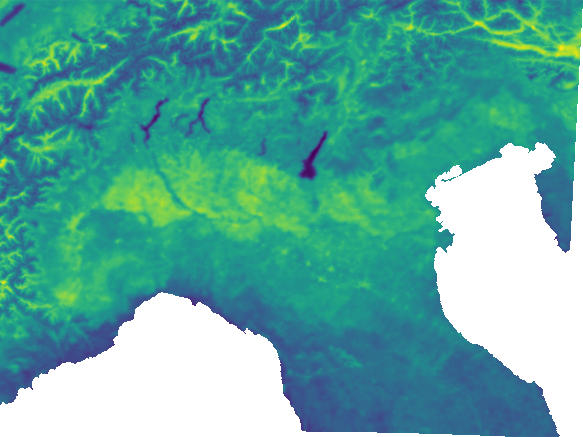

In [42]:
# Display raster map with interactive class
auc_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
auc_map.add_raster("avg_spring_warming")
auc_map.add_layer_control(position = "bottomright")
auc_map.show()

In [43]:
# Define list of months
months=['{0:02d}'.format(m) for m in range(8,11)]

In [44]:
# Annual autumnal cooling
gs.run_command("t.rast.aggregate",
               input="lst_daily",
               output="annual_autumnal_cooling",
               basename="autumnal_cooling",
               suffix="gran",
               method="slope",
               granularity="1 years",
               where=f"strftime('%m',start_time)='{months[0]}' or strftime('%m',start_time)='{months[1]}' or strftime('%m', start_time)='{months[2]}'")

In [45]:
# Check raster maps in the STRDS
gs.run_command("t.rast.list", input="annual_autumnal_cooling")

name|mapset|start_time|end_time
autumnal_cooling_2014|italy_LST_daily|2014-01-01 00:00:00|2015-01-01 00:00:00
autumnal_cooling_2015|italy_LST_daily|2015-01-01 00:00:00|2016-01-01 00:00:00
autumnal_cooling_2016|italy_LST_daily|2016-01-01 00:00:00|2017-01-01 00:00:00
autumnal_cooling_2017|italy_LST_daily|2017-01-01 00:00:00|2018-01-01 00:00:00
autumnal_cooling_2018|italy_LST_daily|2018-01-01 00:00:00|2019-01-01 00:00:00


In [46]:
# Average autumnal cooling
gs.run_command("t.rast.series",
               input="annual_autumnal_cooling",
               output="avg_autumnal_cooling",
               method="average")


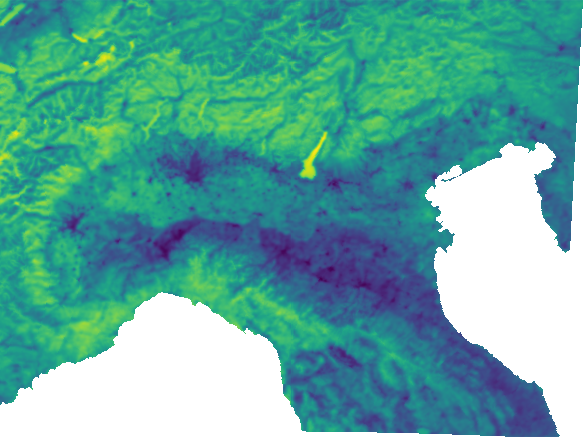

In [47]:
# Display raster map with interactive class
spw_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
spw_map.add_raster("avg_autumnal_cooling")
spw_map.add_layer_control(position = "bottomright")
spw_map.show()

In [48]:
#| warning: false

# Keep only pixels meeting the condition
expression="tmean_higher20_lower30 = if(lst_daily >= 20.0 && lst_daily <= 30.0, 1, null())"

gs.run_command("t.rast.algebra",
               expression=expression, 
               basename="tmean_higher20_lower30",
               suffix="gran",
               nproc=7, 
               flags="n")

['EQUAL'] False False False True && & False False False
lst_2014.001_avg@italy_LST_daily >= 20.0&&(lst_2014.001_avg@italy_LST_daily <= 30.0)
lst_2014.002_avg@italy_LST_daily >= 20.0&&(lst_2014.002_avg@italy_LST_daily <= 30.0)
lst_2014.003_avg@italy_LST_daily >= 20.0&&(lst_2014.003_avg@italy_LST_daily <= 30.0)
lst_2014.004_avg@italy_LST_daily >= 20.0&&(lst_2014.004_avg@italy_LST_daily <= 30.0)
lst_2014.005_avg@italy_LST_daily >= 20.0&&(lst_2014.005_avg@italy_LST_daily <= 30.0)
lst_2014.006_avg@italy_LST_daily >= 20.0&&(lst_2014.006_avg@italy_LST_daily <= 30.0)
lst_2014.007_avg@italy_LST_daily >= 20.0&&(lst_2014.007_avg@italy_LST_daily <= 30.0)
lst_2014.008_avg@italy_LST_daily >= 20.0&&(lst_2014.008_avg@italy_LST_daily <= 30.0)
lst_2014.009_avg@italy_LST_daily >= 20.0&&(lst_2014.009_avg@italy_LST_daily <= 30.0)
lst_2014.010_avg@italy_LST_daily >= 20.0&&(lst_2014.010_avg@italy_LST_daily <= 30.0)
lst_2014.011_avg@italy_LST_daily >= 20.0&&(lst_2014.011_avg@italy_LST_daily <= 30.0)
lst_2014.

lst_2018.363_avg@italy_LST_daily >= 20.0&&(lst_2018.363_avg@italy_LST_daily <= 30.0)
lst_2018.364_avg@italy_LST_daily >= 20.0&&(lst_2018.364_avg@italy_LST_daily <= 30.0)
lst_2018.365_avg@italy_LST_daily >= 20.0&&(lst_2018.365_avg@italy_LST_daily <= 30.0)
1 null()


In [49]:
# Count how many times per year the condition is met
gs.run_command("t.rast.aggregate",
               input="tmean_higher20_lower30", 
               output="count_tmean_higher20_lower30",
               basename="tmean_higher20_lower30",
               suffix="gran",
               method="count",
               granularity="1 years")

In [50]:
# Check raster maps in the STRDS
gs.run_command("t.rast.list", 
               input="count_tmean_higher20_lower30", 
               columns="name,start_time,min,max")

name|start_time|min|max
tmean_higher20_lower30_2014|2014-01-01 00:00:00|0.0|173.0
tmean_higher20_lower30_2015|2015-01-01 00:00:00|0.0|155.0
tmean_higher20_lower30_2016|2016-01-01 00:00:00|0.0|158.0
tmean_higher20_lower30_2017|2017-01-01 00:00:00|0.0|146.0
tmean_higher20_lower30_2018|2018-01-01 00:00:00|0.0|172.0


In [51]:
# Average number of days with LSTmean >= 20 and <= 30
gs.run_command("t.rast.series",
               input="count_tmean_higher20_lower30",
               output="avg_count_tmean_higher20_lower30",
               method="average")


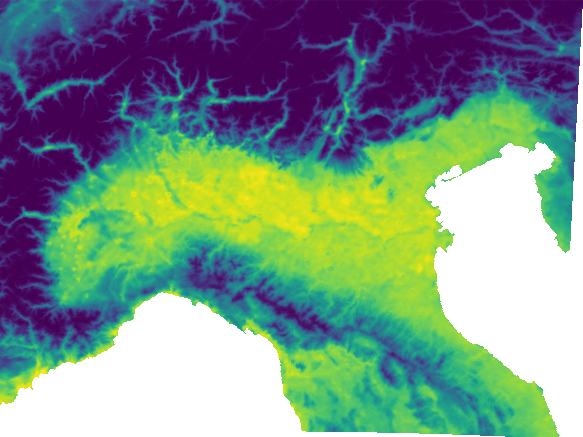

In [52]:
# Display raster map with interactive class
h20_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
h20_map.add_raster("avg_count_tmean_higher20_lower30")
h20_map.add_layer_control(position = "bottomright")
h20_map.show()

In [53]:
# Create annual mask
gs.run_command("t.rast.aggregate",
               input="lst_daily",
               output="annual_mask",
               basename="annual_mask",
               suffix="gran",
               granularity="1 year",
               method="count")

In [54]:
# Replace values by zero
expression="if(annual_mask, 0)"

gs.run_command("t.rast.mapcalc",
               input="annual_mask",
               output="annual_mask_0",
               expression=expression,
               basename="annual_mask_0")

In [55]:
#| warning: false

# Calculate consecutive days with LST <= -10.0
expression="lower_m10_consec_days = annual_mask_0 {+,contains,l} if(lst_daily <= -10.0 && lst_daily[-1] <= -10.0 || lst_daily[1] <= -10.0 && lst_daily <= -10.0, 1, 0)"

gs.run_command("t.rast.algebra",
               expression=expression,
               basename="lower_m10",
               suffix="gran",
               nproc=7)

['EQUAL'] False False False True && & False False False
lst_2014.002_avg@italy_LST_daily <= -10.0&&(lst_2014.001_avg@italy_LST_daily <= -10.0)
lst_2014.003_avg@italy_LST_daily <= -10.0&&(lst_2014.002_avg@italy_LST_daily <= -10.0)
lst_2014.004_avg@italy_LST_daily <= -10.0&&(lst_2014.003_avg@italy_LST_daily <= -10.0)
lst_2014.005_avg@italy_LST_daily <= -10.0&&(lst_2014.004_avg@italy_LST_daily <= -10.0)
lst_2014.006_avg@italy_LST_daily <= -10.0&&(lst_2014.005_avg@italy_LST_daily <= -10.0)
lst_2014.007_avg@italy_LST_daily <= -10.0&&(lst_2014.006_avg@italy_LST_daily <= -10.0)
lst_2014.008_avg@italy_LST_daily <= -10.0&&(lst_2014.007_avg@italy_LST_daily <= -10.0)
lst_2014.009_avg@italy_LST_daily <= -10.0&&(lst_2014.008_avg@italy_LST_daily <= -10.0)
lst_2014.010_avg@italy_LST_daily <= -10.0&&(lst_2014.009_avg@italy_LST_daily <= -10.0)
lst_2014.011_avg@italy_LST_daily <= -10.0&&(lst_2014.010_avg@italy_LST_daily <= -10.0)
lst_2014.012_avg@italy_LST_daily <= -10.0&&(lst_2014.011_avg@italy_LST_dai

lst_2018.326_avg@italy_LST_daily <= -10.0&&(lst_2018.325_avg@italy_LST_daily <= -10.0)
lst_2018.327_avg@italy_LST_daily <= -10.0&&(lst_2018.326_avg@italy_LST_daily <= -10.0)
lst_2018.328_avg@italy_LST_daily <= -10.0&&(lst_2018.327_avg@italy_LST_daily <= -10.0)
lst_2018.329_avg@italy_LST_daily <= -10.0&&(lst_2018.328_avg@italy_LST_daily <= -10.0)
lst_2018.330_avg@italy_LST_daily <= -10.0&&(lst_2018.329_avg@italy_LST_daily <= -10.0)
lst_2018.331_avg@italy_LST_daily <= -10.0&&(lst_2018.330_avg@italy_LST_daily <= -10.0)
lst_2018.332_avg@italy_LST_daily <= -10.0&&(lst_2018.331_avg@italy_LST_daily <= -10.0)
lst_2018.333_avg@italy_LST_daily <= -10.0&&(lst_2018.332_avg@italy_LST_daily <= -10.0)
lst_2018.334_avg@italy_LST_daily <= -10.0&&(lst_2018.333_avg@italy_LST_daily <= -10.0)
lst_2018.335_avg@italy_LST_daily <= -10.0&&(lst_2018.334_avg@italy_LST_daily <= -10.0)
lst_2018.336_avg@italy_LST_daily <= -10.0&&(lst_2018.335_avg@italy_LST_daily <= -10.0)
lst_2018.337_avg@italy_LST_daily <= -10.0&&

lst_2018.312_avg@italy_LST_daily <= -10.0&&(lst_2018.311_avg@italy_LST_daily <= -10.0)||(lst_2018.313_avg@italy_LST_daily <= -10.0)
lst_2018.313_avg@italy_LST_daily <= -10.0&&(lst_2018.312_avg@italy_LST_daily <= -10.0)||(lst_2018.314_avg@italy_LST_daily <= -10.0)
lst_2018.314_avg@italy_LST_daily <= -10.0&&(lst_2018.313_avg@italy_LST_daily <= -10.0)||(lst_2018.315_avg@italy_LST_daily <= -10.0)
lst_2018.315_avg@italy_LST_daily <= -10.0&&(lst_2018.314_avg@italy_LST_daily <= -10.0)||(lst_2018.316_avg@italy_LST_daily <= -10.0)
lst_2018.316_avg@italy_LST_daily <= -10.0&&(lst_2018.315_avg@italy_LST_daily <= -10.0)||(lst_2018.317_avg@italy_LST_daily <= -10.0)
lst_2018.317_avg@italy_LST_daily <= -10.0&&(lst_2018.316_avg@italy_LST_daily <= -10.0)||(lst_2018.318_avg@italy_LST_daily <= -10.0)
lst_2018.318_avg@italy_LST_daily <= -10.0&&(lst_2018.317_avg@italy_LST_daily <= -10.0)||(lst_2018.319_avg@italy_LST_daily <= -10.0)
lst_2018.319_avg@italy_LST_daily <= -10.0&&(lst_2018.318_avg@italy_LST_daily

lst_2018.341_avg@italy_LST_daily <= -10.0&&(lst_2018.340_avg@italy_LST_daily <= -10.0)||(lst_2018.342_avg@italy_LST_daily <= -10.0)&&(lst_2018.341_avg@italy_LST_daily <= -10.0)
lst_2018.342_avg@italy_LST_daily <= -10.0&&(lst_2018.341_avg@italy_LST_daily <= -10.0)||(lst_2018.343_avg@italy_LST_daily <= -10.0)&&(lst_2018.342_avg@italy_LST_daily <= -10.0)
lst_2018.343_avg@italy_LST_daily <= -10.0&&(lst_2018.342_avg@italy_LST_daily <= -10.0)||(lst_2018.344_avg@italy_LST_daily <= -10.0)&&(lst_2018.343_avg@italy_LST_daily <= -10.0)
lst_2018.344_avg@italy_LST_daily <= -10.0&&(lst_2018.343_avg@italy_LST_daily <= -10.0)||(lst_2018.345_avg@italy_LST_daily <= -10.0)&&(lst_2018.344_avg@italy_LST_daily <= -10.0)
lst_2018.345_avg@italy_LST_daily <= -10.0&&(lst_2018.344_avg@italy_LST_daily <= -10.0)||(lst_2018.346_avg@italy_LST_daily <= -10.0)&&(lst_2018.345_avg@italy_LST_daily <= -10.0)
lst_2018.346_avg@italy_LST_daily <= -10.0&&(lst_2018.345_avg@italy_LST_daily <= -10.0)||(lst_2018.347_avg@italy_LST

In [56]:
# Inspect values
gs.run_command("t.rast.list",
               input="lower_m10_consec_days",
               columns="name,start_time,min,max")

name|start_time|min|max
lower_m10_2015|2015-01-01 00:00:00|0.0|213.0
lower_m10_2016|2016-01-01 00:00:00|0.0|217.0
lower_m10_2017|2017-01-01 00:00:00|0.0|195.0
lower_m10_2018|2018-01-01 00:00:00|0.0|173.0


In [57]:
# Median number of consecutive days with LST <= -10
gs.run_command("t.rast.series",
               input="lower_m10_consec_days",
               output="median_lower_m10_consec_days",
               method="median")


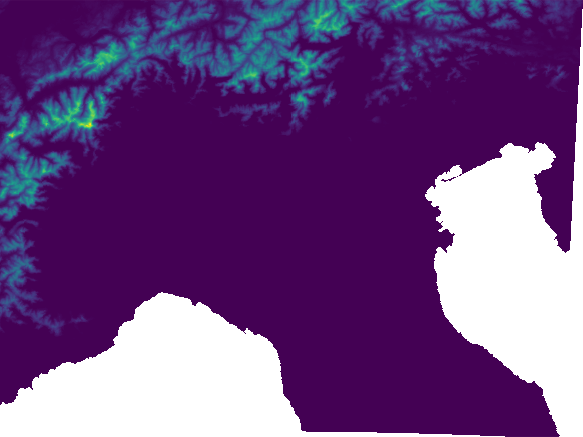

In [58]:
# Display raster map with interactive class
lt10_map = gj.InteractiveMap(width = 500, use_region=True, tiles="OpenStreetMap")
lt10_map.add_raster("median_lower_m10_consec_days")
lt10_map.add_layer_control(position = "bottomright")
lt10_map.show()